# Pré-processamento

In [1]:
import pandas as pd
import numpy as np
import nltk

df = pd.read_csv('atos_2020_nao_anotados2.csv', index_col = 0)
df

,tipo_ato,ato
0,Ato_Substituicao,"Designar os servidores relacionados abaixo, co..."
1,Ato_Substituicao,"Designar ALEXANDRA GUEDES FUKUCHI CORADO, matr..."
2,Ato_Substituicao,"DESIGNAR LUIZ EDUARDO FERNANDES MACHADO, matri..."
3,Ato_Nomeacao_Comissionado,"NOMEAR MANOEL LUIZ CAMILO DE MORAIS ANTUNES, A..."
4,Ato_Exoneracao_Comissionado,"EXONERAR, por motivo de falecimento, LUDWIK DE..."
...,...,...
50276,Ato_Nomeacao_Comissionado,"NOMEAR ADRIANA PEIXOTO GOMES, Tecnico de Gesta..."
50277,Ato_Nomeacao_Comissionado,NOMEAR MARIO MARQUES FRANCO para exercer o Car...
50278,Ato_Exoneracao_Comissionado,EXONERAR BENILSON BATISTA AMORIM do Cargo em C...
50279,Ato_Exoneracao_Comissionado,"EXONERAR, por estar sendo nomeada para outro c..."


In [2]:
df['tipo_ato'].value_counts()

Ato_Substituicao               20797
Ato_Nomeacao_Comissionado      13776
Ato_Exoneracao_Comissionado    10658
Ato_Aposentadoria               3353
Ato_Cessao                       625
Ato_Abono_Permanencia            333
Ato_Exoneracao_Efetivo           323
Ato_Tornado_Sem_Efeito_Apo       292
Ato_Nomeacao_Efetivo              99
Ato_Reversao                      17
Ato_Retificacao_Efetivo            8
Name: tipo_ato, dtype: int64

In [3]:
df = df.sample(frac=1)
df = df.reset_index(drop = True)
original = df.copy()

### Retira caracteres não-alfanuméricos ("(", ",", ".", "\n", etc)

In [4]:
df['ato'] = df.ato.str.replace('\W', ' ')
df

,tipo_ato,ato
0,Ato_Substituicao,DESIGNAR DANIELA MARTINS MACHADO Enfermeira ...
1,Ato_Nomeacao_Comissionado,NOMEAR MANOEL PERES BARBOSA BORGES para exerce...
2,Ato_Nomeacao_Comissionado,NOMEAR JANUI NUNES DA ROCHA para exercer o Car...
3,Ato_Nomeacao_Comissionado,NOMEAR CRISTIANE PINTO COSTA VIEIRA Enfermeir...
4,Ato_Substituicao,Designar PEDRO AUGUSTO GOMES RORIZ JUNIOR mat...
...,...,...
50276,Ato_Substituicao,DESIGNAR o Agente de Policia JEAN PAOLO GALDIN...
50277,Ato_Nomeacao_Comissionado,NOMEAR MATEUS DA SILVA SOUZA para exercer o Ca...
50278,Ato_Exoneracao_Comissionado,EXONERAR por estar sendo nomeada para outro c...
50279,Ato_Nomeacao_Comissionado,NOMEAR FRANCISCO JOSE PEREIRA FAGUNDES para e...


### Remoção de stopwords

In [5]:
stopwords = nltk.corpus.stopwords.words('portuguese')

In [6]:
df['ato'] = df['ato'].apply(lambda x: ' '.join([item for item in x.split() if item not in stopwords]))
df

,tipo_ato,ato
0,Ato_Substituicao,DESIGNAR DANIELA MARTINS MACHADO Enfermeira Ma...
1,Ato_Nomeacao_Comissionado,NOMEAR MANOEL PERES BARBOSA BORGES exercer Car...
2,Ato_Nomeacao_Comissionado,NOMEAR JANUI NUNES DA ROCHA exercer Cargo Comi...
3,Ato_Nomeacao_Comissionado,NOMEAR CRISTIANE PINTO COSTA VIEIRA Enfermeira...
4,Ato_Substituicao,Designar PEDRO AUGUSTO GOMES RORIZ JUNIOR matr...
...,...,...
50276,Ato_Substituicao,DESIGNAR Agente Policia JEAN PAOLO GALDINO VAS...
50277,Ato_Nomeacao_Comissionado,NOMEAR MATEUS DA SILVA SOUZA exercer Cargo Com...
50278,Ato_Exoneracao_Comissionado,EXONERAR estar sendo nomeada outro cargo KELLY...
50279,Ato_Nomeacao_Comissionado,NOMEAR FRANCISCO JOSE PEREIRA FAGUNDES exercer...


### Stemming

In [7]:
stemmer = nltk.stem.RSLPStemmer()

In [8]:
df['ato'] = df['ato'].apply(lambda x: ' '.join([stemmer.stem(item) for item in x.split()]))
df

,tipo_ato,ato
0,Ato_Substituicao,design daniel martim mach enferm matricul 0136...
1,Ato_Nomeacao_Comissionado,nome manoel per barb borg exerc carg comissa s...
2,Ato_Nomeacao_Comissionado,nome janu nun da roch exerc carg comissa simbo...
3,Ato_Nomeacao_Comissionado,nome cristian pint cost vie enferm matricul 14...
4,Ato_Substituicao,design pedr august gom roriz juni matricul 168...
...,...,...
50276,Ato_Substituicao,design agent polic jean paol galdin vasconcel ...
50277,Ato_Nomeacao_Comissionado,nome mat da silv souz exerc carg comissa simbo...
50278,Ato_Exoneracao_Comissionado,exoner est send nome outr carg kelly cristian ...
50279,Ato_Nomeacao_Comissionado,nome francisc jos per fagund exerc carg comiss...


### Carregando modelos

In [9]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.feature_extraction.text import TfidfVectorizer

In [44]:
import pickle
file = open('classificadores_treinados_com_2020', 'rb')
clf_rf = pickle.load(file)
clf_dt = pickle.load(file)
clf_sgd = pickle.load(file)
vectorizer = pickle.load(file)
file.close()

In [45]:
clf_rf

RandomForestClassifier(max_features=0.2, n_jobs=2, random_state=87)

In [46]:
clf_dt

DecisionTreeClassifier(class_weight='balanced', random_state=87)

In [47]:
clf_sgd

SGDClassifier(alpha=0.0002, loss='modified_huber', random_state=87)

In [48]:
vectorizer

TfidfVectorizer(max_df=0.9, min_df=2,
                stop_words=['de', 'a', 'o', 'que', 'e', 'é', 'do', 'da', 'em',
                            'um', 'para', 'com', 'não', 'uma', 'os', 'no', 'se',
                            'na', 'por', 'mais', 'as', 'dos', 'como', 'mas',
                            'ao', 'ele', 'das', 'à', 'seu', 'sua', ...])

### Aplicação do tfidf

In [49]:
X = vectorizer.transform(df['ato'])
X

<50281x2900 sparse matrix of type '<class 'numpy.float64'>'
	with 1447786 stored elements in Compressed Sparse Row format>

# Classificação

In [50]:
from sklearn.metrics import classification_report

In [51]:
y = np.array(df['tipo_ato'])

In [52]:
# Random Forest
y_true, y_pred = y, clf_rf.predict(X)
print(classification_report(y_true, y_pred))

C:\Users\felip\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


                                precision    recall  f1-score   support

         Ato_Abono_Permanencia       0.99      0.31      0.47       333
             Ato_Aposentadoria       0.99      1.00      0.99      3353
                    Ato_Cessao       0.99      1.00      0.99       625
   Ato_Exoneracao_Comissionado       0.97      0.99      0.98     10658
        Ato_Exoneracao_Efetivo       0.15      0.03      0.06       323
     Ato_Nomeacao_Comissionado       0.99      0.98      0.99     13776
          Ato_Nomeacao_Efetivo       0.30      0.69      0.42        99
  Ato_Retificacao_Comissionado       0.00      0.00      0.00         0
       Ato_Retificacao_Efetivo       0.10      1.00      0.19         8
                  Ato_Reversao       0.59      1.00      0.74        17
              Ato_Substituicao       0.99      1.00      1.00     20797
    Ato_Tornado_Sem_Efeito_Apo       1.00      0.39      0.56       292
Ato_Tornado_Sem_Efeito_Exo_Nom       0.00      0.00      0.00  

In [53]:
# Decision Tree Classifier
y_true, y_pred = y, clf_dt.predict(X)
print(classification_report(y_true, y_pred))

                                precision    recall  f1-score   support

         Ato_Abono_Permanencia       0.28      0.71      0.40       333
             Ato_Aposentadoria       0.94      0.97      0.96      3353
                    Ato_Cessao       0.97      1.00      0.98       625
   Ato_Exoneracao_Comissionado       0.81      0.99      0.89     10658
        Ato_Exoneracao_Efetivo       0.02      0.07      0.03       323
     Ato_Nomeacao_Comissionado       1.00      0.98      0.99     13776
          Ato_Nomeacao_Efetivo       0.37      1.00      0.54        99
  Ato_Retificacao_Comissionado       0.00      0.00      0.00         0
       Ato_Retificacao_Efetivo       0.00      1.00      0.00         8
                  Ato_Reversao       0.23      1.00      0.38        17
              Ato_Substituicao       1.00      0.64      0.78     20797
    Ato_Tornado_Sem_Efeito_Apo       0.97      0.53      0.68       292
Ato_Tornado_Sem_Efeito_Exo_Nom       0.00      0.00      0.00  

In [54]:
# SGD
y_true, y_pred = y, clf_sgd.predict(X)
print(classification_report(y_true, y_pred))

                                precision    recall  f1-score   support

         Ato_Abono_Permanencia       0.97      0.31      0.47       333
             Ato_Aposentadoria       0.94      1.00      0.97      3353
                    Ato_Cessao       0.97      1.00      0.98       625
   Ato_Exoneracao_Comissionado       0.95      0.99      0.97     10658
        Ato_Exoneracao_Efetivo       0.14      0.03      0.05       323
     Ato_Nomeacao_Comissionado       0.84      0.97      0.90     13776
          Ato_Nomeacao_Efetivo       0.36      1.00      0.53        99
  Ato_Retificacao_Comissionado       0.00      0.00      0.00         0
       Ato_Retificacao_Efetivo       0.01      1.00      0.02         8
                  Ato_Reversao       0.08      1.00      0.14        17
              Ato_Substituicao       1.00      0.85      0.92     20797
    Ato_Tornado_Sem_Efeito_Apo       1.00      0.03      0.05       292
Ato_Tornado_Sem_Efeito_Exo_Nom       0.00      0.00      0.00  

# Matriz de confusão

In [55]:
from sklearn.metrics import plot_confusion_matrix
from matplotlib import pyplot as plt

def plotConfusionMatrix(classifier, X_test, y_test, class_names):
    np.set_printoptions(precision=2)

    fig, ax = plt.subplots(figsize=(13, 13))
    disp = plot_confusion_matrix(classifier, X_test, y_test,display_labels=class_names,cmap=plt.cm.Blues, ax = ax)
    disp.ax_.set_title("Matriz de Confusão")
    plt.show()

In [56]:
atos_nomes = ['Abono', 'Apo', 'Cessao', 'ExoCom', 'ExoEfe', 'NomCom', 'NomEfe', 'RetCom', 'RetEfe', 'Rev', 'Subs', 'SEApo', 'SEExoNom']

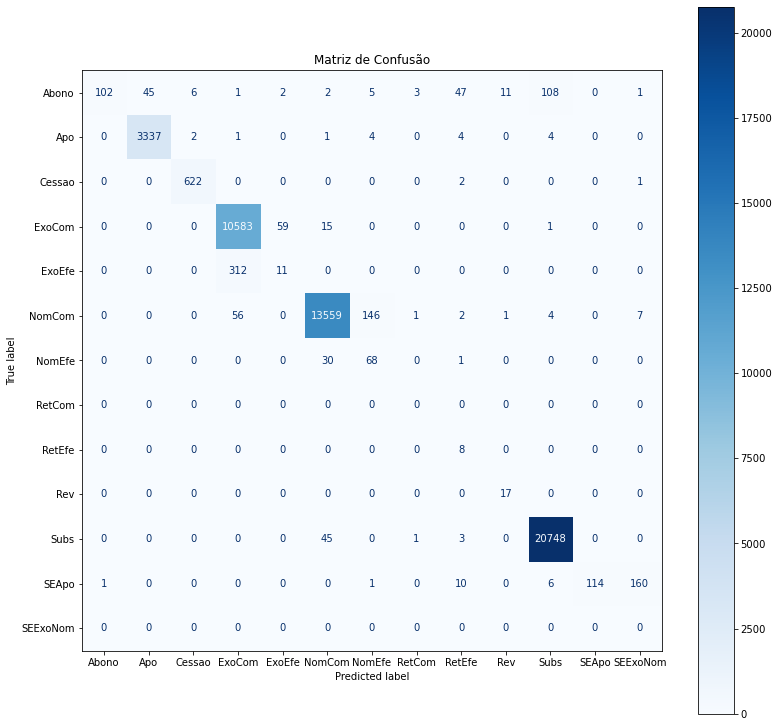

In [57]:
plotConfusionMatrix(clf_rf, X, y, atos_nomes)

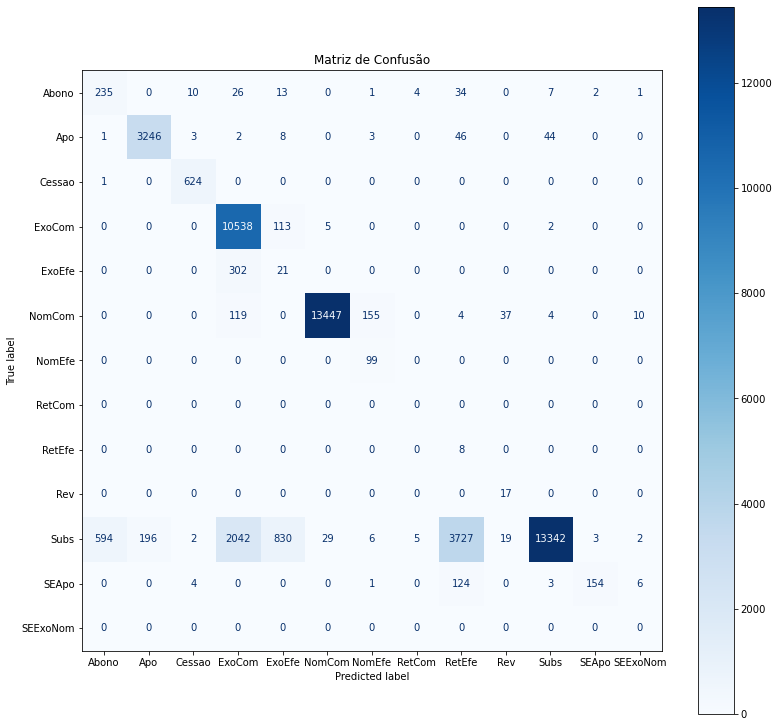

In [58]:
plotConfusionMatrix(clf_dt, X, y, atos_nomes)

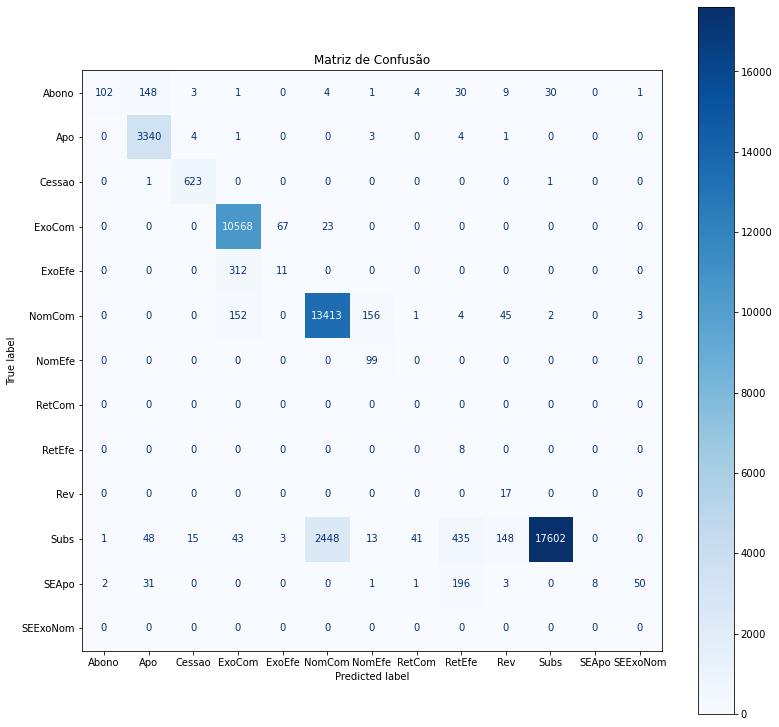

In [59]:
plotConfusionMatrix(clf_sgd, X, y, atos_nomes)

## Cohen's kappa

In [60]:
y_rf = clf_rf.predict(X)
y_dt = clf_dt.predict(X)
y_sgd = clf_sgd.predict(X)

In [61]:
from sklearn.metrics import cohen_kappa_score
print("RFC: %.3f" %cohen_kappa_score(y, y_rf))
print("DTC: %.3f" %cohen_kappa_score(y, y_dt))
print("SGD: %.3f" %cohen_kappa_score(y, y_sgd))

RFC: 0.969
DTC: 0.775
SGD: 0.875


In [62]:
from sklearn.metrics import cohen_kappa_score
print("RFC com DTC: %.3f" %cohen_kappa_score(y_dt, y_rf))
print("DTC com SGD: %.3f" %cohen_kappa_score(y_sgd, y_dt))
print("SGD com RFC: %.3f" %cohen_kappa_score(y_rf, y_sgd))

RFC com DTC: 0.783
DTC com SGD: 0.770
SGD com RFC: 0.892


## Fleiss' kappa

In [63]:
np.unique(y)

array(['Ato_Abono_Permanencia', 'Ato_Aposentadoria', 'Ato_Cessao',
       'Ato_Exoneracao_Comissionado', 'Ato_Exoneracao_Efetivo',
       'Ato_Nomeacao_Comissionado', 'Ato_Nomeacao_Efetivo',
       'Ato_Retificacao_Efetivo', 'Ato_Reversao', 'Ato_Substituicao',
       'Ato_Tornado_Sem_Efeito_Apo'], dtype=object)

In [64]:
m = {}
index = 0
for i in np.unique(y):
    m[i] = index
    index += 1
    
m['Ato_Tornado_Sem_Efeito_Exo_Nom'] = 11
m['Ato_Retificacao_Comissionado'] = 12
m

{'Ato_Abono_Permanencia': 0,
 'Ato_Aposentadoria': 1,
 'Ato_Cessao': 2,
 'Ato_Exoneracao_Comissionado': 3,
 'Ato_Exoneracao_Efetivo': 4,
 'Ato_Nomeacao_Comissionado': 5,
 'Ato_Nomeacao_Efetivo': 6,
 'Ato_Retificacao_Efetivo': 7,
 'Ato_Reversao': 8,
 'Ato_Substituicao': 9,
 'Ato_Tornado_Sem_Efeito_Apo': 10,
 'Ato_Tornado_Sem_Efeito_Exo_Nom': 11,
 'Ato_Retificacao_Comissionado': 12}

In [65]:
fun = np.vectorize(lambda x: m[x])

In [66]:
fun(y)

array([9, 5, 5, ..., 3, 5, 5])

In [67]:
np.zeros((2, 5))

array([[0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.]])

In [68]:
len(y)

50281

In [69]:
k = np.zeros((len(y), 13))

In [70]:
fy = fun(y)
fy_rf = fun(y_rf)
fy_dt = fun(y_dt)
fy_sgd = fun(y_sgd)

In [71]:
for i in range(0, len(y)):
    k[i][fy[i]] += 1
    k[i][fy_rf[i]] += 1
    k[i][fy_dt[i]] += 1
    k[i][fy_sgd[i]] += 1

In [72]:
k[:5]

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 4., 0., 0., 0.],
       [0., 0., 0., 0., 0., 4., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 4., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 4., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 4., 0., 0., 0.]])

In [73]:
from statsmodels.stats.inter_rater import fleiss_kappa
fleiss_kappa(k)

0.841374259201344

In [74]:
fleiss_kappa(k, method = 'rand')

0.8741414914845237

# Análise das confianças dos modelos

### Confiança média geral

In [75]:
probs_rf = clf_rf.predict_proba(X)
probs_dt = clf_dt.predict_proba(X)
probs_sgd = clf_sgd.predict_proba(X)

In [96]:
probs_rf

array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [77]:
type(probs_rf)

numpy.ndarray

In [99]:
def confianca_media(array):
    n = len(array)
    return sum(np.amax(array, axis = 1))/n

In [100]:
confianca_media(probs_rf)

0.8912838646805208

In [101]:
confianca_media(probs_dt)

0.9997485639088219

In [102]:
confianca_media(probs_sgd)

0.8019762430996443

### Confiança por tipo de ato

In [105]:
atos = np.unique(y)
atos

array(['Ato_Abono_Permanencia', 'Ato_Aposentadoria', 'Ato_Cessao',
       'Ato_Exoneracao_Comissionado', 'Ato_Exoneracao_Efetivo',
       'Ato_Nomeacao_Comissionado', 'Ato_Nomeacao_Efetivo',
       'Ato_Retificacao_Efetivo', 'Ato_Reversao', 'Ato_Substituicao',
       'Ato_Tornado_Sem_Efeito_Apo'], dtype=object)

In [111]:
probs_rf = {}
probs_dt = {}
probs_sgd = {}

In [112]:
for ato in atos:    
    lista = []
    for i in range(0, len(y)):
        label = y[i]
        if label == ato:
            lista.append(i)
            
    probs_rf_type = clf_rf.predict_proba(X[lista])
    probs_dt_type = clf_dt.predict_proba(X[lista])
    probs_sgd_type = clf_sgd.predict_proba(X[lista])
    
    probs_rf[ato] = confianca_media(probs_rf_type)
    probs_dt[ato] = confianca_media(probs_dt_type)
    probs_sgd[ato] = confianca_media(probs_sgd_type)

In [119]:
probs_rf = dict(sorted(probs_rf.items(), key=lambda item: item[1], reverse = True))
probs_dt = dict(sorted(probs_dt.items(), key=lambda item: item[1], reverse = True))
probs_sgd = dict(sorted(probs_sgd.items(), key=lambda item: item[1], reverse = True))

In [127]:
for ato in probs_rf:
    print('%s: %.3f' %(ato, probs_rf[ato]))

Ato_Exoneracao_Efetivo: 0.960
Ato_Nomeacao_Comissionado: 0.956
Ato_Aposentadoria: 0.950
Ato_Exoneracao_Comissionado: 0.921
Ato_Substituicao: 0.847
Ato_Reversao: 0.836
Ato_Retificacao_Efetivo: 0.825
Ato_Cessao: 0.617
Ato_Nomeacao_Efetivo: 0.581
Ato_Tornado_Sem_Efeito_Apo: 0.430
Ato_Abono_Permanencia: 0.398


In [128]:
for ato in probs_dt:
    print('%s: %.3f' %(ato, probs_dt[ato]))

Ato_Abono_Permanencia: 1.000
Ato_Aposentadoria: 1.000
Ato_Cessao: 1.000
Ato_Exoneracao_Comissionado: 1.000
Ato_Exoneracao_Efetivo: 1.000
Ato_Nomeacao_Efetivo: 1.000
Ato_Retificacao_Efetivo: 1.000
Ato_Reversao: 1.000
Ato_Substituicao: 1.000
Ato_Tornado_Sem_Efeito_Apo: 1.000
Ato_Nomeacao_Comissionado: 0.999


In [129]:
for ato in probs_sgd:
    print('%s: %.3f' %(ato, probs_sgd[ato]))

Ato_Aposentadoria: 0.970
Ato_Nomeacao_Comissionado: 0.930
Ato_Exoneracao_Efetivo: 0.917
Ato_Cessao: 0.901
Ato_Exoneracao_Comissionado: 0.882
Ato_Reversao: 0.847
Ato_Retificacao_Efetivo: 0.845
Ato_Nomeacao_Efetivo: 0.725
Ato_Substituicao: 0.651
Ato_Tornado_Sem_Efeito_Apo: 0.590
Ato_Abono_Permanencia: 0.556
